In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf


In [2]:
df= pd.read_csv("C:\\Users\\pradyumn\\Documents\\Assignment\\delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
X=df[["Delivery Time"]]
Y=df[["Sorting Time"]]


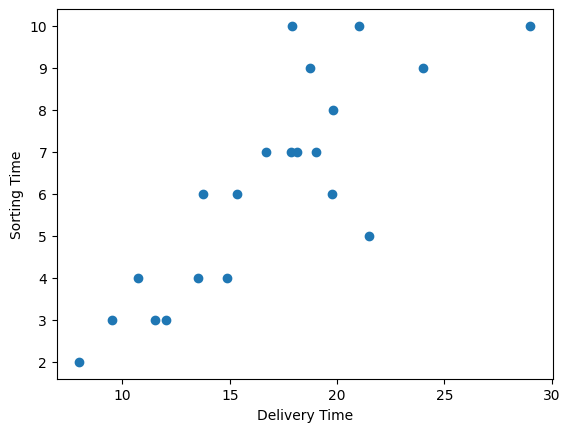

In [5]:
plt.scatter(X,Y)
plt.ylabel("Sorting Time")
plt.xlabel("Delivery Time")
plt.show()

array([[<Axes: title={'center': 'Delivery Time'}>,
        <Axes: title={'center': 'Sorting Time'}>]], dtype=object)

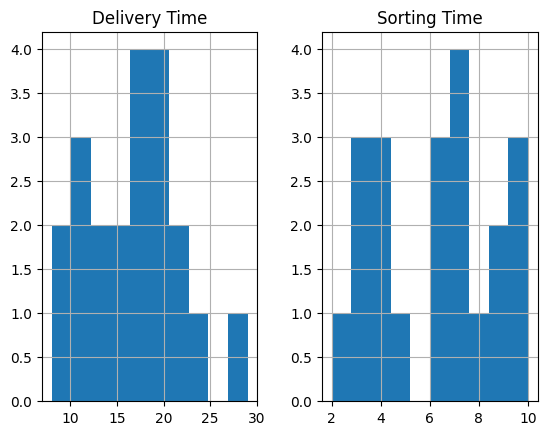

In [6]:
df.hist()

<Axes: >

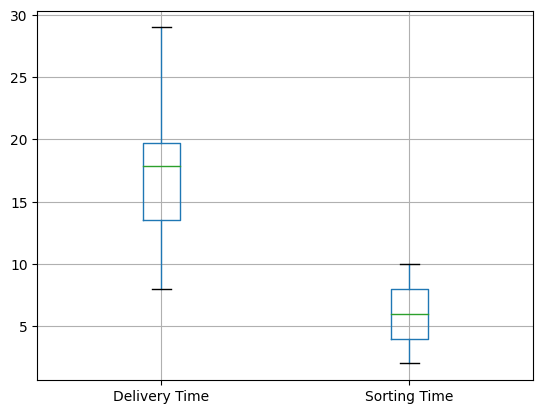

In [7]:
df.boxplot()

In [8]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='Delivery Time', ylabel='Sorting Time'>

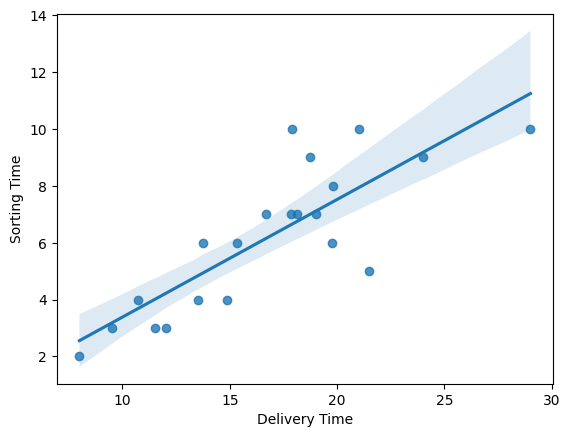

In [9]:
sns.regplot(x=X,y=Y)

In [26]:
model=smf.ols("X~Y",data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        23:02:28   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Y              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Testing


In [19]:
model.params


Intercept    6.582734
Y            1.649020
dtype: float64

In [20]:
model.tvalues , model.pvalues


(Intercept    3.823349
 Y            6.387447
 dtype: float64,
 Intercept    0.001147
 Y            0.000004
 dtype: float64)

In [21]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [29]:
model2 = smf.ols("np.log(Y)~X", data=df).fit() 
model2.params
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(Y)   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           2.64e-06
Time:                        23:06:11   Log-Likelihood:               -0.85600
No. Observations:                  21   AIC:                             5.712
Df Residuals:                      19   BIC:                             7.801
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4372      0.204      2.139      0.046       0.009       0.865
X              0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
(model2.rsquared,model2.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

In [32]:
model3 = smf.ols("np.sqrt(Y)~X", data=df).fit() 
model3.params
model3.summary()     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.sqrt(Y)   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           2.61e-06
Time:                        23:06:58   Log-Likelihood:                -3.5906
No. Observations:                  21   AIC:                             11.18
Df Residuals:                      19   BIC:                             13.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9609      0.233      4.128      0.001       0.474       1.448
X              0.0877      0.013      6.592      0.000       0.060       0.116
==============================================================================
Omnibus:                        0.087   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.957   Jarque-Bera (JB):                0.114
Skew:                           0.099   Prob(JB):                        0.945
Kurtosis:                       2.698   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
(model3.rsquared,model3.rsquared_adj)

(0.695806227630867, 0.6797960290851232)

# Prediction

In [35]:
nd=pd.Series([10,5]) 

In [36]:
data_pred=pd.DataFrame(nd, columns=['X'])
data_pred

,X
0,10
1,5


In [37]:
model3.predict(data_pred)

0    1.837641
1    1.399287
dtype: float64

# Hence, np.sqrt transforfation model is suitable accuracy for the data.